In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 데이터 로드
auto = pd.read_csv("C:/Users/bikmi/Desktop/Bigdata_HW/HW2/Auto.csv")

# '?' 값을 NaN으로 대체하고 NaN 값을 삭제
auto["horsepower"] = pd.to_numeric(auto["horsepower"], errors="coerce")
auto.dropna(inplace=True)

(a) Simple linear regressiona analysis

i. Is there a relationship beteween the predictor and the response?

X: 예측 변수 (독립 변수) → horsepower

y: 반응 변수 (종속 변수) → mpg

선형 회귀 모델을 훈련하고 p-value를 통해 유의미한 관계가 있는지 확인한다.

In [6]:
# 1. X, y 정의 (예측 변수와 반응 변수 설정)
X = auto[["horsepower"]]  # 예측 변수: horsepower
y = auto["mpg"]  # 반응 변수: mpg

# 2. 훈련용 데이터와 테스트 데이터 분리 (선택적)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 4. statsmodels로 상세한 회귀 분석 수행
X_sm = sm.add_constant(X)  # 절편 포함
sm_model = sm.OLS(y, X_sm).fit()

# 회귀 분석 결과 출력
print(sm_model.summary())

# (i) P-value로 예측 변수와 반응 변수 간 관계 유무 확인
p_value = sm_model.pvalues["horsepower"]
print(f"P-value for horsepower: {p_value:.4f}")

relationship = "있음" if p_value < 0.05 else "없음"
print(f"(i) 예측 변수(horsepower)와 반응 변수(mpg) 간의 관계가 {relationship}.")

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           7.03e-81
Time:                        14:48:22   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

ii. How strong is the relationship between the predictor and the response?

R-squared 값: 예측 변수(horsepower)가 반응 변수(mpg)의 변동을 얼마나 잘 설명하는지 나타냄.

In [7]:
# (ii) R-squared 값으로 관계의 강도 평가
r_squared = sm_model.rsquared
print(f"(ii) R-squared: {r_squared:.4f}")

(ii) R-squared: 0.6059


iii. Is the relationship between the predictor and the response positive or negative?

회귀 계수(coefficient): 예측 변수와 반응 변수 간의 관계가 양의 관계인지 음의 관계인지 나타낸다.

In [8]:
# (iii) 관계의 방향 확인 (회귀 계수)
coef = model.coef_[0]
direction = "음의" if coef < 0 else "양의"
print(f"(iii) 예측 변수와 반응 변수 간의 관계는 {direction} 관계이다.")

(iii) 예측 변수와 반응 변수 간의 관계는 음의 관계입니다.


iv. What is the predicted mpg associated with a horsepower of 98? 

What are the associated 95% confidence and prediction intervals?

horsepower = 98일 때의 mpg를 예측하고, 95% 신뢰 구간을 계산한다.

In [10]:
# (iv) horsepower가 98일 때 mpg 예측 (데이터프레임 사용)
new_hp = pd.DataFrame({"horsepower": [98]})
predicted_mpg = model.predict(new_hp)[0]
print(f"(iv) horsepower가 98일 때 예측된 mpg: {predicted_mpg:.2f}")

(iv) horsepower가 98일 때 예측된 mpg: 24.67


In [20]:
import statsmodels.api as sm

# 1. 데이터 로드 및 정제
auto["horsepower"] = pd.to_numeric(auto["horsepower"], errors="coerce")
auto = auto.dropna(subset=["mpg", "horsepower"])

# 2. 독립 변수와 종속 변수 정의
X = sm.add_constant(auto["horsepower"])  # 절편 추가
y = auto["mpg"]

# 3. OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 4. 마력(horsepower) = 98에서 예측값과 신뢰 구간 계산
new_data = pd.DataFrame({"const": 1, "horsepower": [98]})
prediction = model.get_prediction(new_data)

# 5. 예측값과 95% 신뢰 구간 및 예측 구간 출력
prediction_summary = prediction.summary_frame(alpha=0.05)
print(prediction_summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

산점도와 회귀 직선을 시각화해 데이터와 회귀선의 관계를 확인한다.

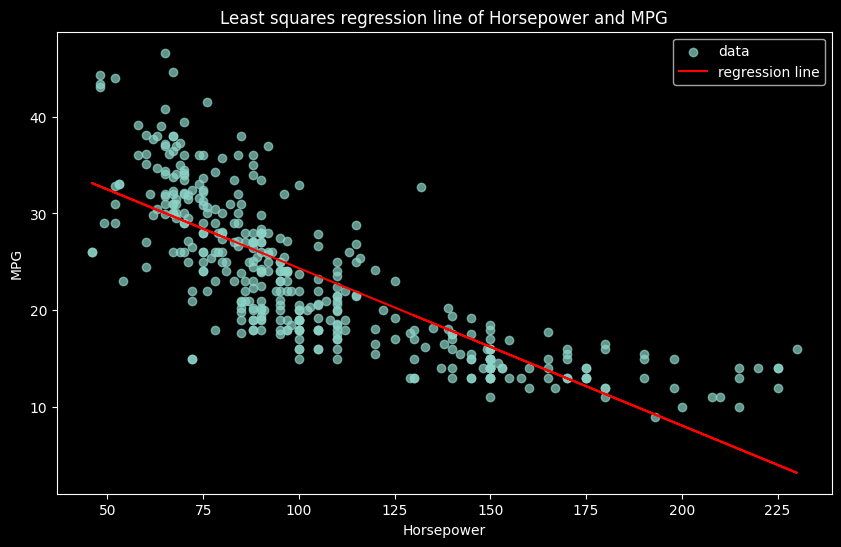

In [13]:
# 산점도와 회귀 직선 그리기
plt.figure(figsize=(10, 6))
plt.scatter(auto["horsepower"], auto["mpg"], label="data", alpha=0.7)
plt.plot(auto["horsepower"], model.predict(X), color="red", label="regression line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Least squares regression line of Horsepower and MPG")
plt.legend()
plt.show()

(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

잔차 플롯을 통해 회귀 모델의 적합성을 평가한다. 패턴이 보이면 모델이 적절하지 않을 수 있다.

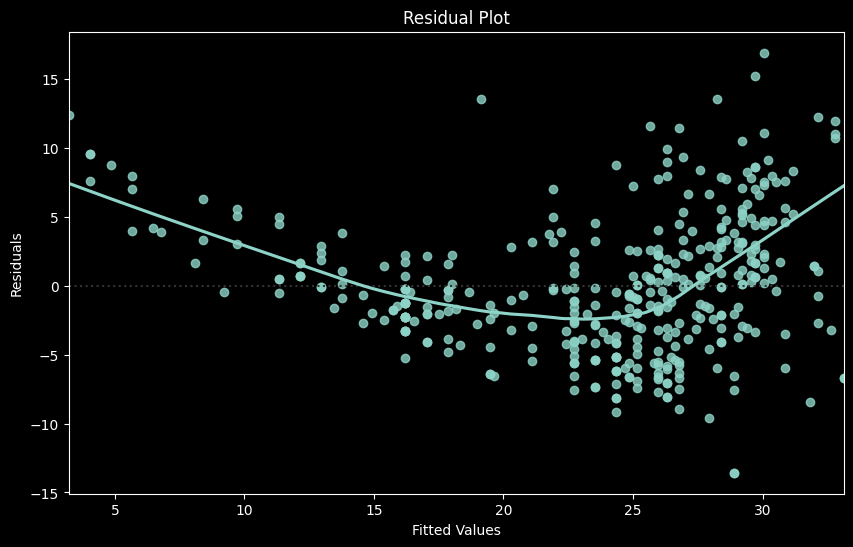

In [15]:
# 잔차 계산 및 플롯
residuals = y - model.predict(X)

plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X), y=residuals, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

해당 Residual Plot을 보면 특정한 곡선 패턴이 나타나고 있다. 잔차가 무작위로 퍼지지 않고, 예측값(Fitted Values)에 따라 U자 모양의 곡선을 형성하고 있습니다. 이는 선형 회귀 모델이 데이터의 실제 관계를 충분히 설명하지 못한다는 의미이다.

잔차는 모델이 얼마나 잘 데이터에 적합되는지를 평가하는 중요한 도구이다. 이상적인 경우, 잔차는 예측 값에 대해 무작위로 분포되어야 한다.

이상적인 잔차 플롯의 특징:
잔차가 X축을 기준으로 고르게 퍼져 있음.
잔차의 평균이 0에 가까움.
특정한 패턴(직선적, 곡선적)이나 구조가 보이지 않음.

**패턴이 보이는 경우 모델이 부적절한 이유**
1. 선형 관계가 아님:
잔차가 곡선 패턴을 보이면, 독립 변수(X)와 종속 변수(y) 간의 관계가 선형(linear)이 아니라 비선형(nonlinear)임을 의미한다. 이 경우, 단순 선형 회귀 모델이 데이터를 잘 설명하지 못한다.

2. 모델의 누락된 변수 문제:
만약 특정한 패턴이 나타난다면, 모델에 포함되지 않은 중요한 변수(독립 변수)가 있을 가능성이 있다.

3. 이분산성(Heteroscedasticity):
잔차의 분포가 특정 구간에서 넓고 다른 구간에서는 좁은 경우, 즉 잔차의 분산이 일정하지 않은 경우(이분산성)가 문제이다. 이분산성은 모델이 예측의 불확실성을 정확히 반영하지 못함을 의미한다.

4. 오류의 자기상관(Autocorrelation):
잔차가 시간이나 순서에 따라 패턴을 보이는 경우, 자기상관(autocorrelation)이 발생한 것이다. 이는 독립 관측값들 사이에 상관관계가 있음을 의미한다.